# Predicción de Calidad de Vinos usando Deep Learning

## Objetivo
Crear un modelo de deep learning que prediga la calidad de vinos basándose en sus características fisicoquímicas.

## Dataset
Utilizaremos el dataset de Wine Quality del UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv), que contiene las siguientes características:

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Variable objetivo:
- quality (puntaje entre 0 y 10)

## Tareas a realizar

1. **Carga y exploración de datos**
   - Cargar el dataset
   - Realizar un análisis exploratorio básico
   - Visualizar distribuciones y correlaciones

2. **Preprocesamiento**
   - Manejar valores faltantes si existen
   - Normalizar las características
   - Dividir en conjuntos de entrenamiento y prueba

3. **Construcción del modelo**
   - Diseñar una arquitectura de red neuronal apropiada
   - Compilar el modelo con las métricas adecuadas

4. **Entrenamiento y evaluación**
   - Entrenar el modelo
   - Evaluar su rendimiento
   - Visualizar resultados

## Retos adicionales
- Comparar diferentes arquitecturas de red
- Implementar validación cruzada
- Realizar ajuste de hiperparámetros
- Convertir el problema en clasificación binaria (vinos buenos vs malos)


In [45]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=";")

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
# Detectar nulos
nulos = df.isnull()
print(nulos.sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [38]:
# Normalizar
df_normalized = (df - df.min()) / (df.max() - df.min())  # Min-Max Scaling
df_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


In [ ]:
# dividir en entrenamiento y prueba
X = df.drop('quality', axis='columns')
y = df.quality

xTrain,xTest,yTrain,yTest = train_test_split(X,y, train_size = 0.7,shuffle=True,random_state=1)

In [49]:
# diseñar una red neuronal apropiada

# Número de características en la entrada
input_dim = 11  # Porque tienes 11 columnas en tu dataset

# Número de clases en la salida (por ejemplo, si "quality" tiene 6 clases: 0,1,2,3,4,5,6,7,8,9,10)
num_classes = 10  # Ajusta según el número real de clases en tu dataset

# Definir el modelo secuencial
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),  # Capa oculta 1
    Dense(32, activation='relu'),  # Capa oculta 2
    Dense(num_classes, activation='softmax')  # Capa de salida con softmax
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ver resumen del modelo
model.summary()



c:\Users\albaro\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,178 (12.41 KB)

 Trainable params: 3,178 (12.41 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Suponiendo que ya tienes tus datos preparados en X_train, y_train
model.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0971 - loss: 6.6058 - val_accuracy: 0.4152 - val_loss: 1.8077
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4762 - loss: 1.4989 - val_accuracy: 0.4509 - val_loss: 1.2846
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4821 - loss: 1.2507 - val_accuracy: 0.4688 - val_loss: 1.1775
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4735 - loss: 1.1951 - val_accuracy: 0.4911 - val_loss: 1.1611
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4902 - loss: 1.2075 - val_accuracy: 0.4732 - val_loss: 1.1718
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4866 - loss: 1.1617 - val_accuracy: 0.4330 - val_loss: 1.1839
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4860 - loss: 1.1872 - val_accuracy: 0.4420 - val_loss: 1.2106
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5022 - loss: 1.1098 - val_accuracy: 0.4732 - val_loss

In [48]:
loss, accuracy = model.evaluate(xTest, yTest)
print(f"Pérdida en test: {loss:.4f}")
print(f"Precisión en test: {accuracy:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6112 - loss: 0.9410 
Pérdida en test: 1.0204
Precisión en test: 0.5854


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2457 - loss: 5.6159 - val_accuracy: 0.4598 - val_loss: 1.5572
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4858 - loss: 1.3743 - val_accuracy: 0.4554 - val_loss: 1.3160
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4938 - loss: 1.2575 - val_accuracy: 0.4643 - val_loss: 1.2447
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5144 - loss: 1.1115 - val_accuracy: 0.4420 - val_loss: 1.1906
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5219 - loss: 1.1265 - val_accuracy: 0.4554 - val_loss: 1.1937
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5148 - loss: 1.1303 - val_accuracy: 0.4955 - val_loss: 1.1871
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5040 - loss: 1.1363 - val_accuracy: 0.4866 - val_loss: 1.1815
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5121 - loss: 1.1172 - val_accuracy: 0.5134 - val_loss

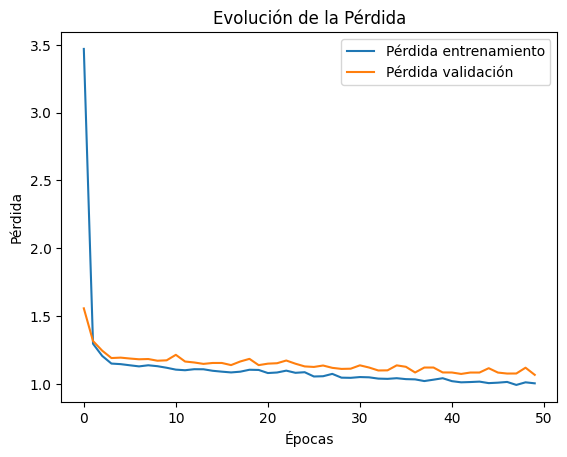

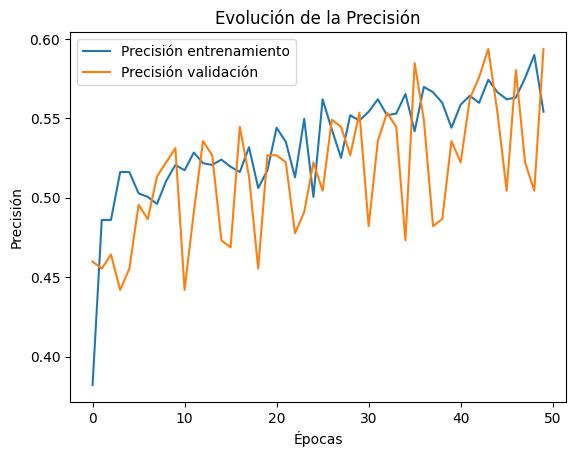

In [51]:
import matplotlib.pyplot as plt

# Entrenar el modelo con historial
history = model.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_split=0.2)

# Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la Pérdida')
plt.show()

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Evolución de la Precisión')
plt.show()
